# Student Performance Indicator
### Life cycle of Machine learning Project
. Understanding the Problem Statement
. Data Collection
. Data Checks to perform
. Exploratory data analysis
. Data Pre-Processing
. Model Training
. Choose best model

#### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV data as pandas dataframe

In [3]:
df=pd.read_csv("data/stud.csv")


Show top 5 records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


> Shape of the Dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset Information

. Gender: sex of student -> (Male/female)
. parental level of education : parents' final education ->(bachelor's degree,some college,
  master's degree,associate's degree,high school)
. lunch : having lunch before test (standard or free/reduced)
. test preparation course : complete or not complete before test
. math score
. reading score
. writing score

#### 3. Data checks to perform

. Check Missing values
. Check Duplicates
. Check data type
. Check the number f unique values of each column
. Check statistics of data set
. Check various categories present in the different categorical column

#### 3.1 Check Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

> There are no duplicates in dataset


> 3.3 Check Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


> 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

> 3.5 check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


> Insight

. From above description of numerical data, all means are very close to each other - between 66 and 68.05
. All standard deviations are also close - between 14.6 and 15.19
. While there is a minimum score 0 for math, for writing minimum is much higher =10 and for  
  reading much higher =17

> 3.7 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable :  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end=' ')
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable : ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable :   ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable  ['standard' 'free/reduced']
Categories in 'test preparation course' variable  ['none' 'completed']


#### Seperating the nemerical and cateforical columns

In [12]:
numeric_features=[ feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#printing the numerical and categorical features

print('we have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print(f'we have {len(categorical_features)} categorical features: {categorical_features}')

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


> 3.8 Adding columns for "Total Score" and "Average"

In [15]:
df["total_score"]= df["math_score"]+df["reading_score"]+df["writing_score"]
df["average_score"]=df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,229,76.333333


> Details about no of students who scored maximum marks and no of student who scored less than 20

In [34]:
math_full_score=df[df["math_score"]==100]["average_score"].count()
reading_full_score=df[df["reading_score"]==100]["average_score"].count()
writing_full_score=df[df["writing_score"]==100]["average_score"].count()

math_min_score=df[df["math_score"]<=20]["average_score"].count()
reading_min_score=df[df["reading_score"]<=20]["average_score"].count()
writing_min_score=df[df["writing_score"]<=20]["average_score"].count()

print(f'No of students with maximum marks in Maths:{math_full_score}')
print(f'No of students with maximum marks in Reading:{reading_full_score}')
print(f'No of students with maximum marks in Writing:{writing_full_score}')
print("***"*25)
print(f'No of students with minimum / less than 20 marks in Maths:{math_min_score}')
print(f'No of students with minimum / less than 20 marks in Reading:{reading_min_score}')
print(f'No of students with minimum / less than 20 marks in Writing:{writing_min_score}')

No of students with maximum marks in Maths:7
No of students with maximum marks in Reading:17
No of students with maximum marks in Writing:14
***************************************************************************
No of students with minimum / less than 20 marks in Maths:4
No of students with minimum / less than 20 marks in Reading:1
No of students with minimum / less than 20 marks in Writing:3


> Insights
. From above values we can understand students performed worst in maths
. Reading section has best performance from students

## 4. Exploring Data ( Visualization )
### 4.1 Visualize average score distribution to make some conclusion.
. Histogram
. Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

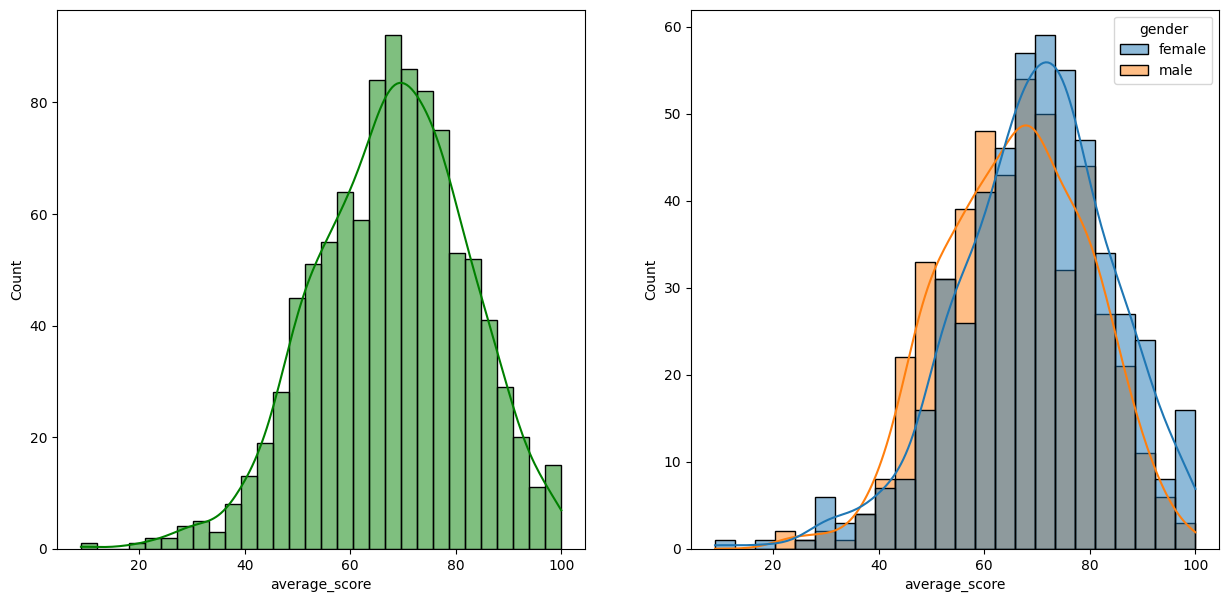

In [46]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

> Insights
. Female students tend to perform well than male students

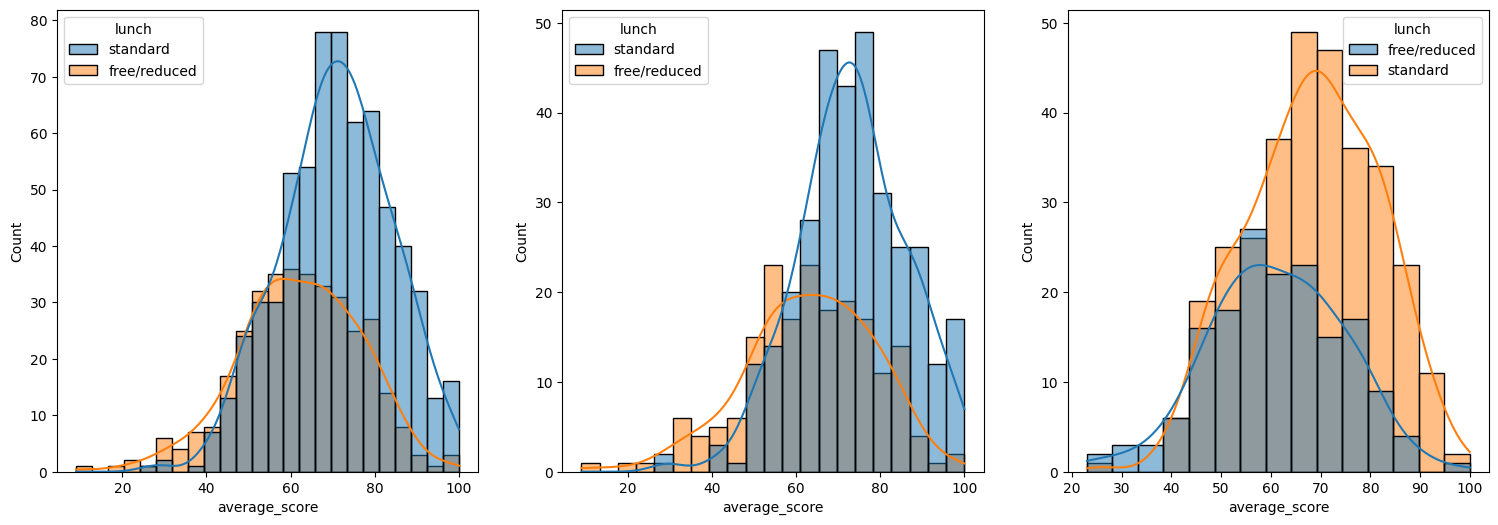

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

> Insights :
. Standard lunch helps perform well in exams
. Standard lunch helps perform well in exams be it a male or a female

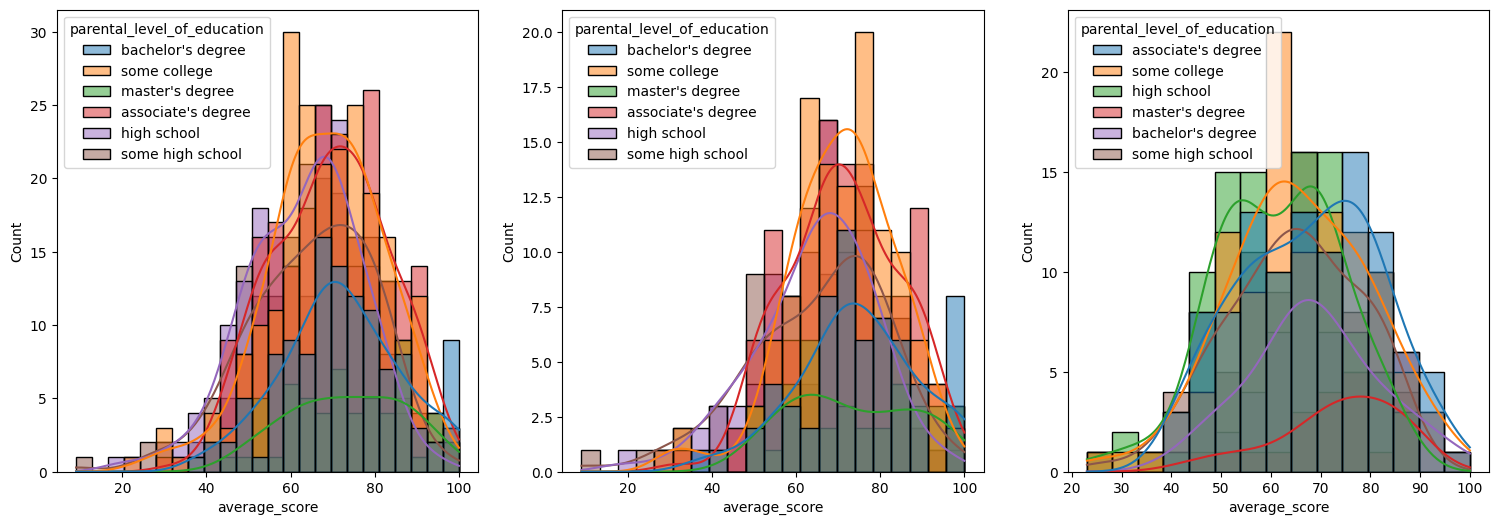

In [59]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

> Insights :
. In general and in both male and female students it can be observed that parental level of education doesnt effect the performance of students

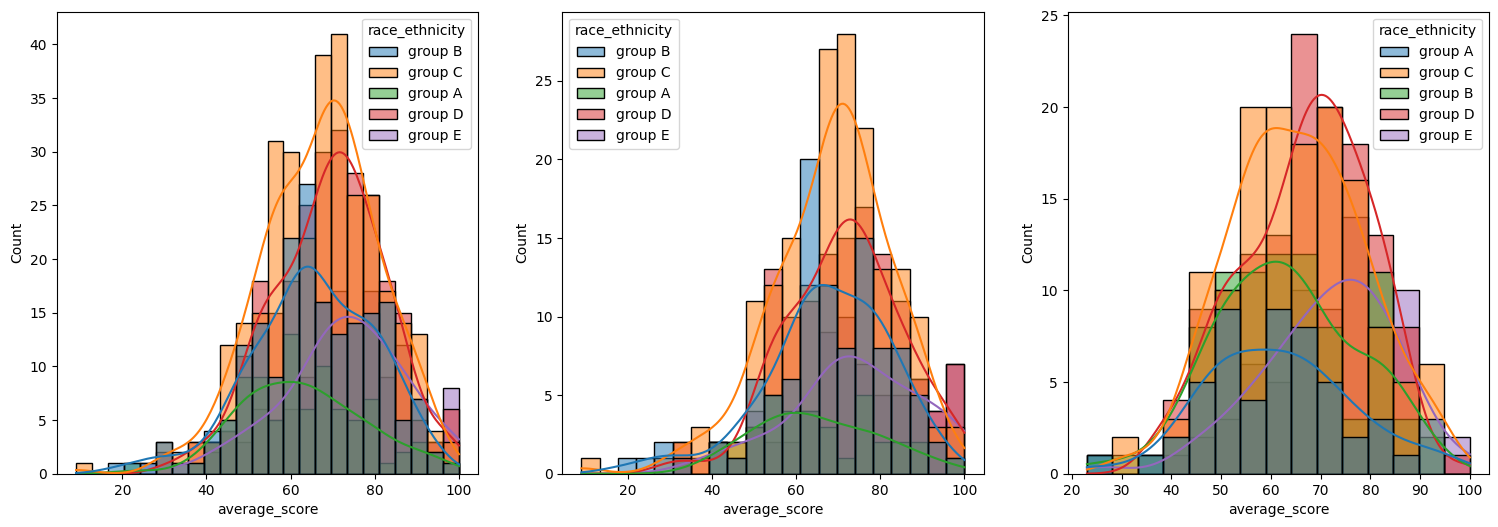

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

> Insights:
. In general students of group c tend to perform well in exams followed by group D
. In female students category, students of group c tend to perform well followed by group B
. In male students , students of group D tend to perform well followed by Group C

,> Maximum score of students in all three stubjects

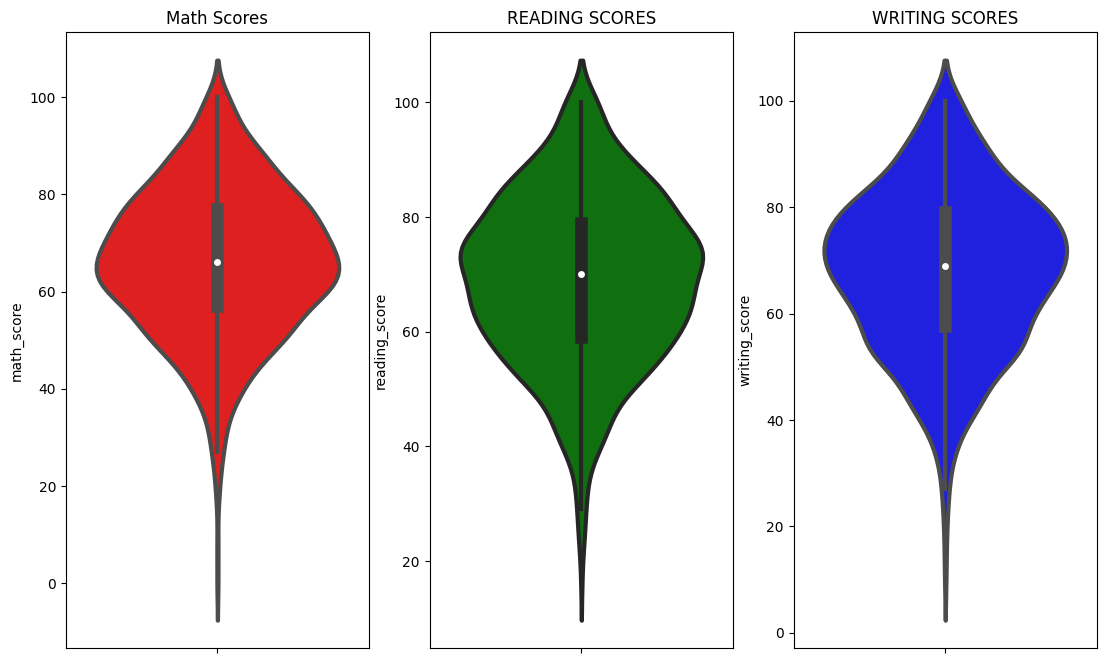

In [61]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

> Insights
. From three violin plots it is clear that most of the studens score in between 60-80 in maths and 50-80 in both reading and writing

#### 4.3 Multivariate analysis using pieplot

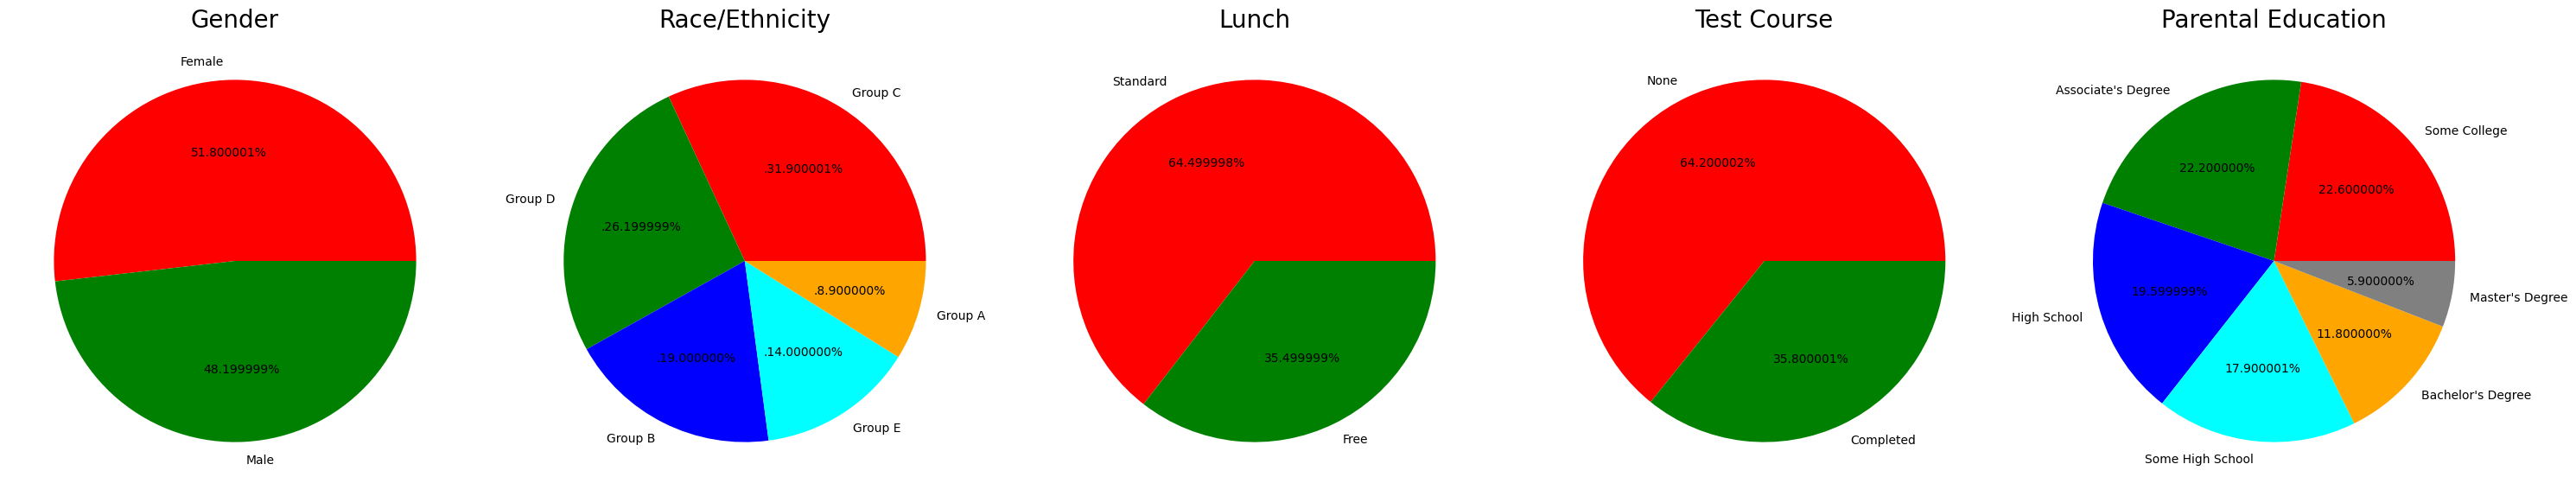

In [67]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')



plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

> Insights

. Number of Male and Female students is almost equal
. Number students are greatest in Group C
. Number of students who have standard lunch are greater
. Number of students who have not enrolled in any test preparation course is greater
. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature wise visualization

#### 4.4.1 Gender Column

. How is Gender distributed
. Does gender has any impact on student's performance

> Univariate analysis ( Distribution of Gender)

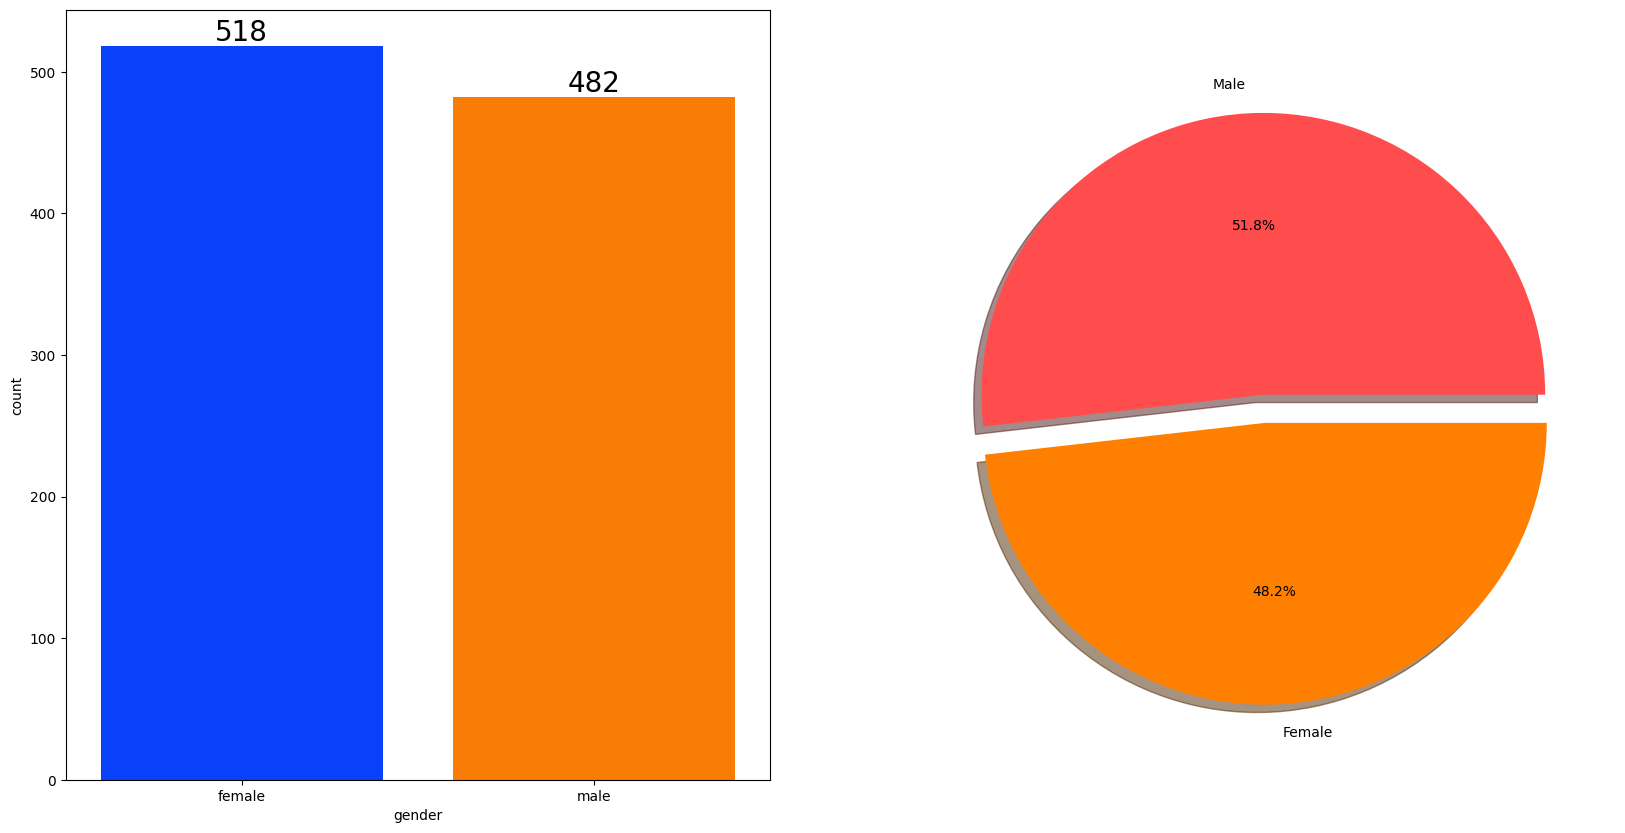

In [68]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

> Insights
. Gender has balanced data with Male 482(48%) and Female 518(52%)

> BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [69]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,total_score,average_score
gender,,,,,,
female,63.633205,72.608108,72.467181,208.708494,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,197.512448,65.837483


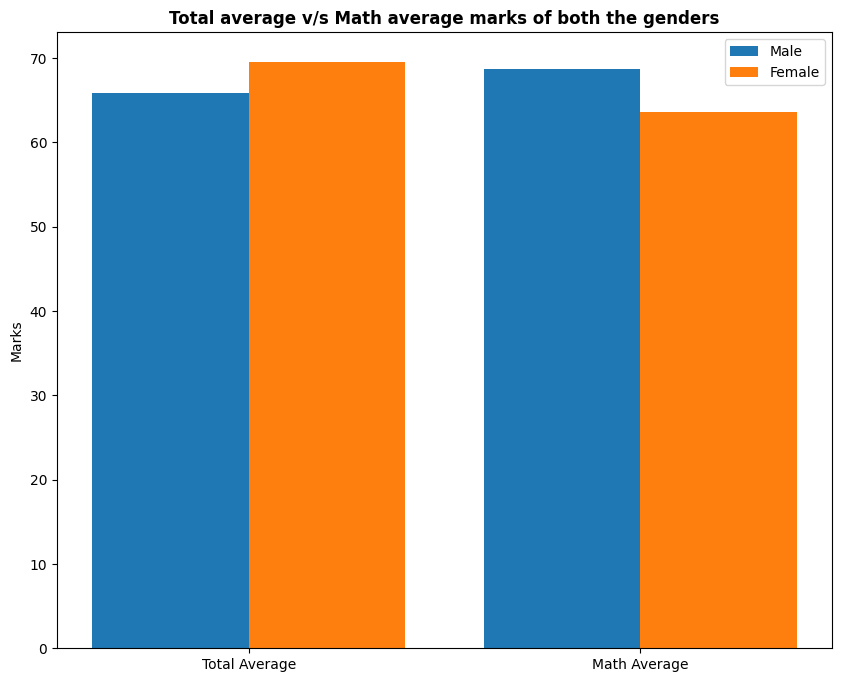

In [70]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

> Insights
. On an average females have a better overall score than men.
. whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN

. How is Group wise distribution ?
. Is Race/Ehnicity has any impact on student's performance ?

> UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

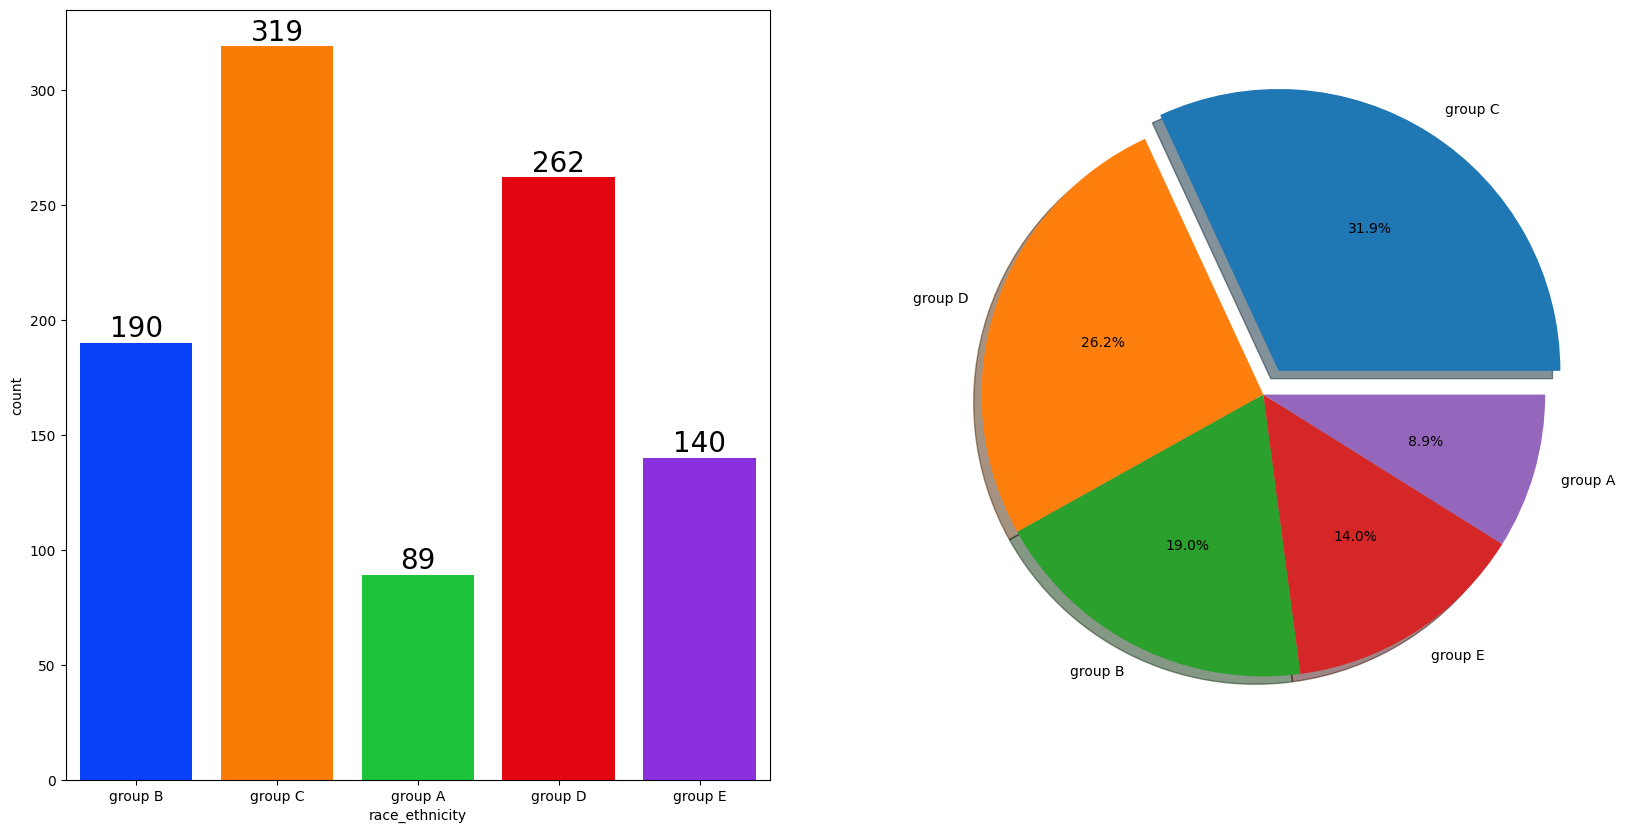

In [72]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

> Insights

. Most of the student belonging from group C/group D
. Lowest number of students belong to group A

> BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

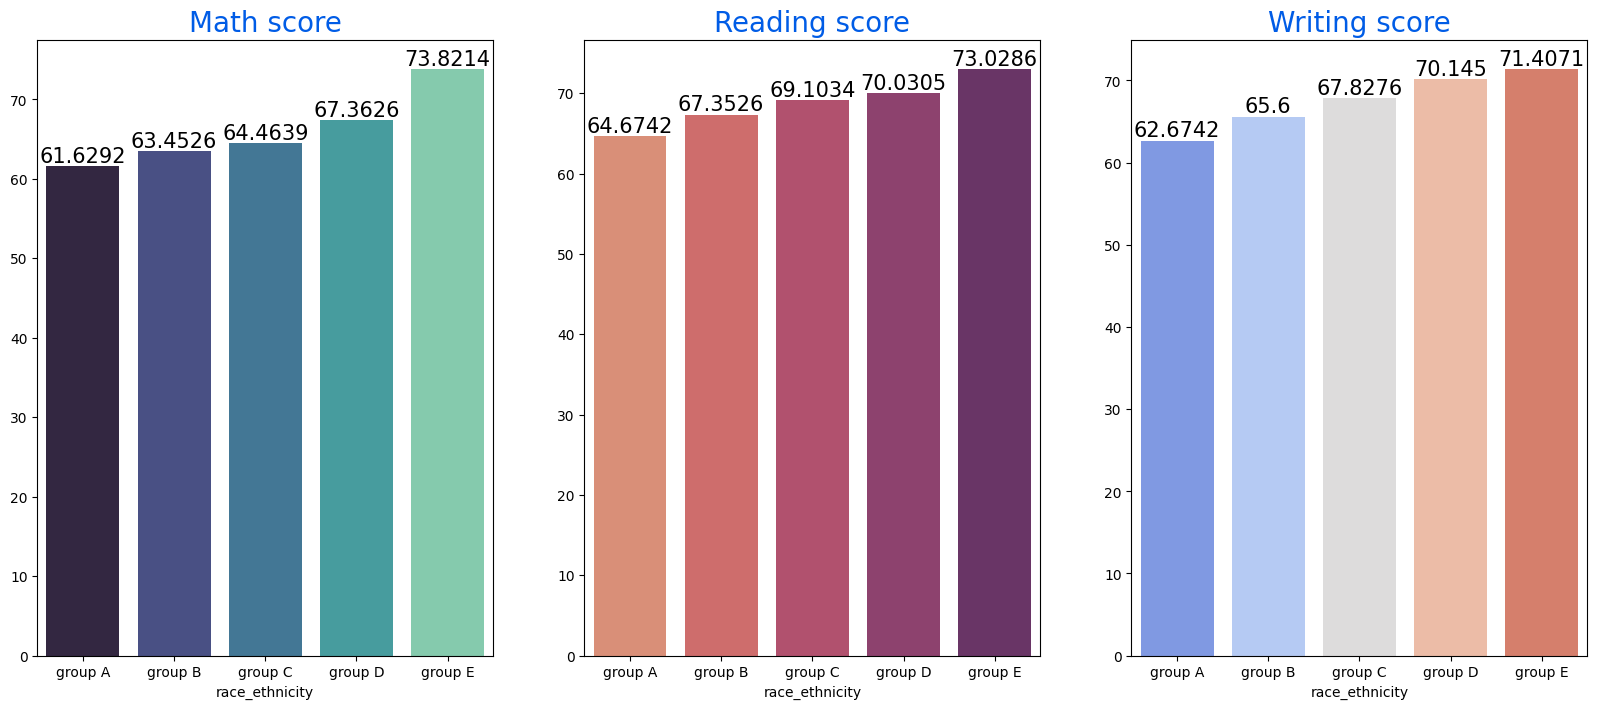

In [73]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

> Insights

. Group E students have scored the highest marks
. Group A students have scored the lowest marks
. Students from a lower socio economic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
. What is educational background of student's parent ?
. Is parental education has any impact on student's performance ?

> UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [81]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: "bachelor's degree"

> BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

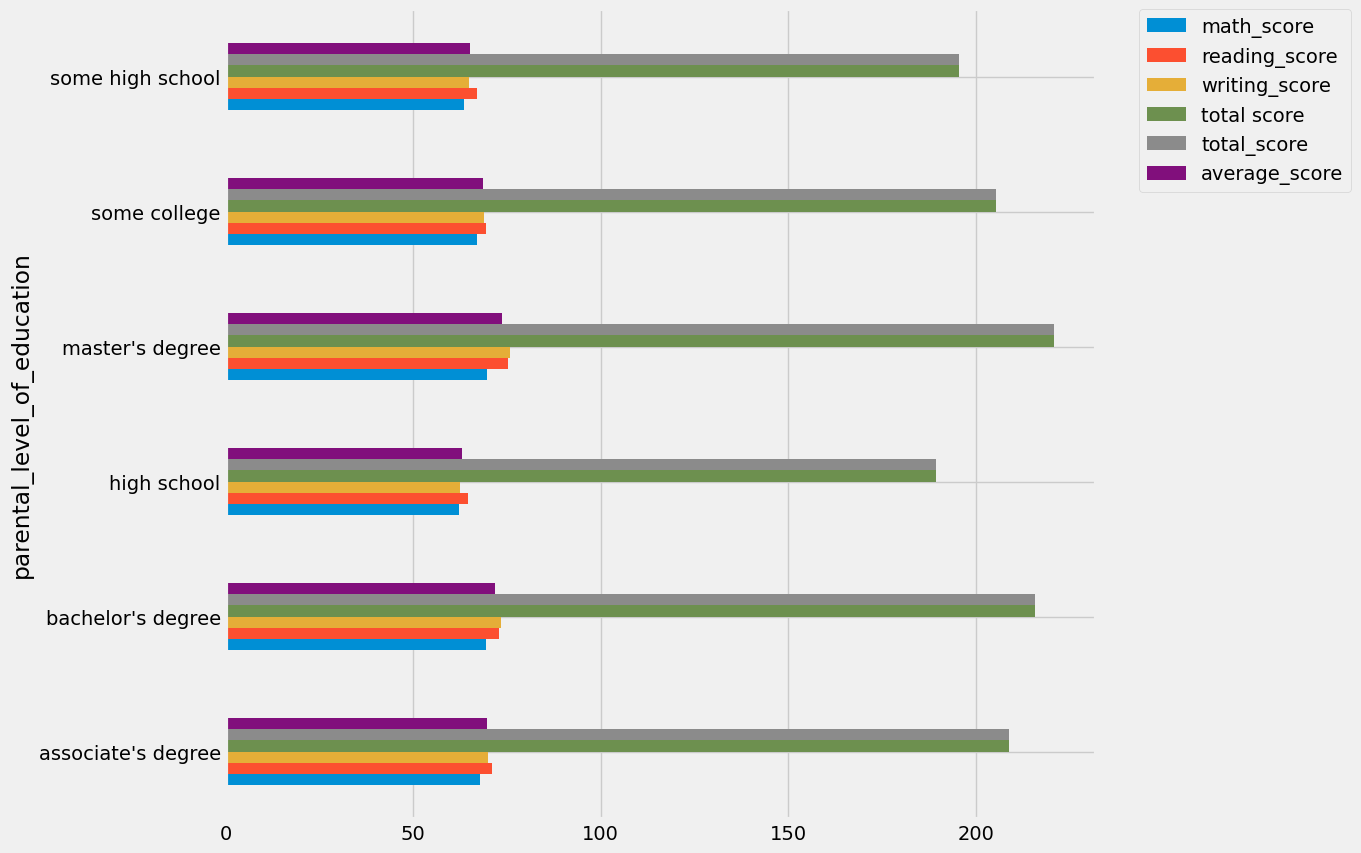

In [82]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),borderaxespad=0.)
plt.show()

> Insights
. The score of student whose parents possess master and bachealor level education are higher than others


#### 4.4.4 Lunch Column

. Which type of lunch is most common among students
. what is the effect of lunch type on test result

> Univariate analysis (Which type of lunch is most common among students ?)

In [85]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: 'standard'

#### 4.4.5 Test Preparation course column

* Which type of lunch is most common among students
* Is test preparation course has any impact on students performance

> Birvariate analysis ( Is test preparation course has any impact on students performance)


<Axes: xlabel='lunch', ylabel='writing_score'>

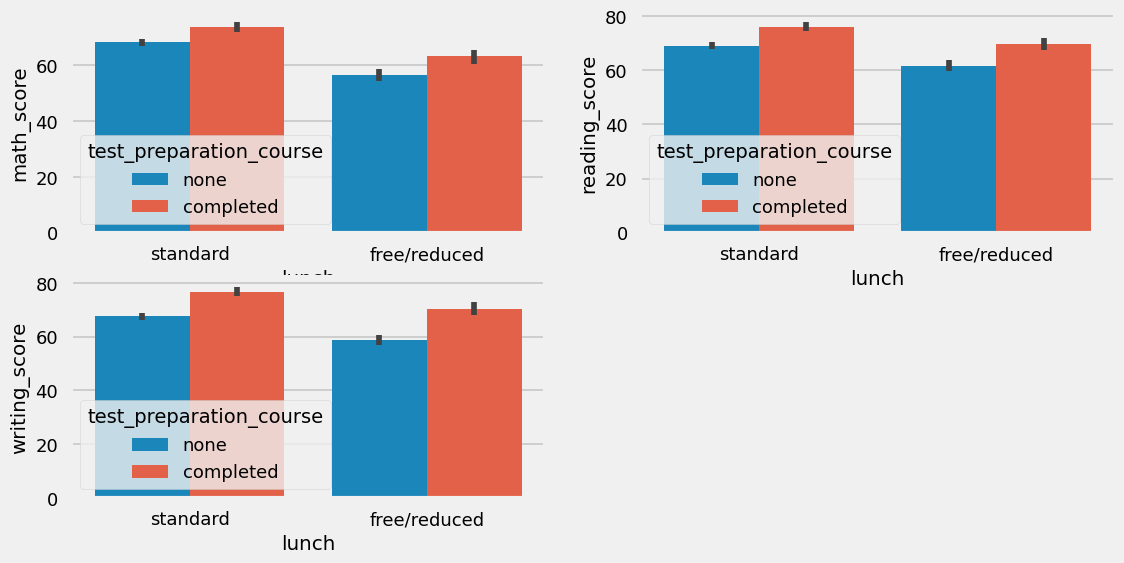

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

> Insights
* Students who have completed the Test preparation course have scores higher in all three categories 
  than those who havent taken the course 

#### 4.4.6 Checking Outliers

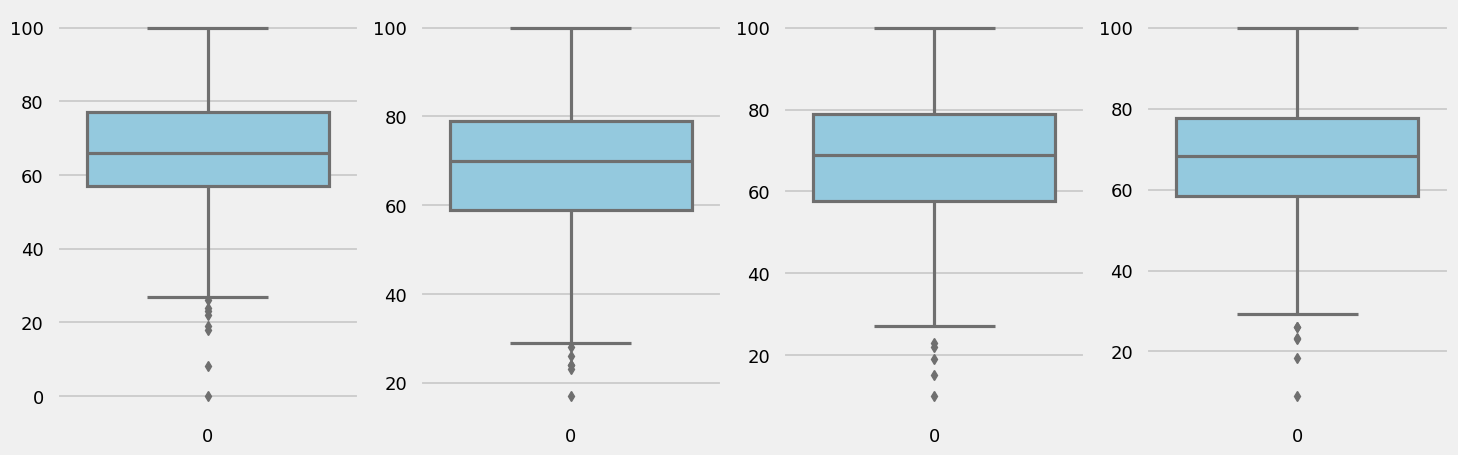

In [92]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df["math_score"],color="skyblue")
plt.subplot(142)
sns.boxplot(df["reading_score"],color="skyblue")
plt.subplot(143)
sns.boxplot(df["writing_score"],color="skyblue")
plt.subplot(144)
sns.boxplot(df["average_score"],color="skyblue")
plt.show()


#### 4.4.7 Multivariate analysis using pairplot


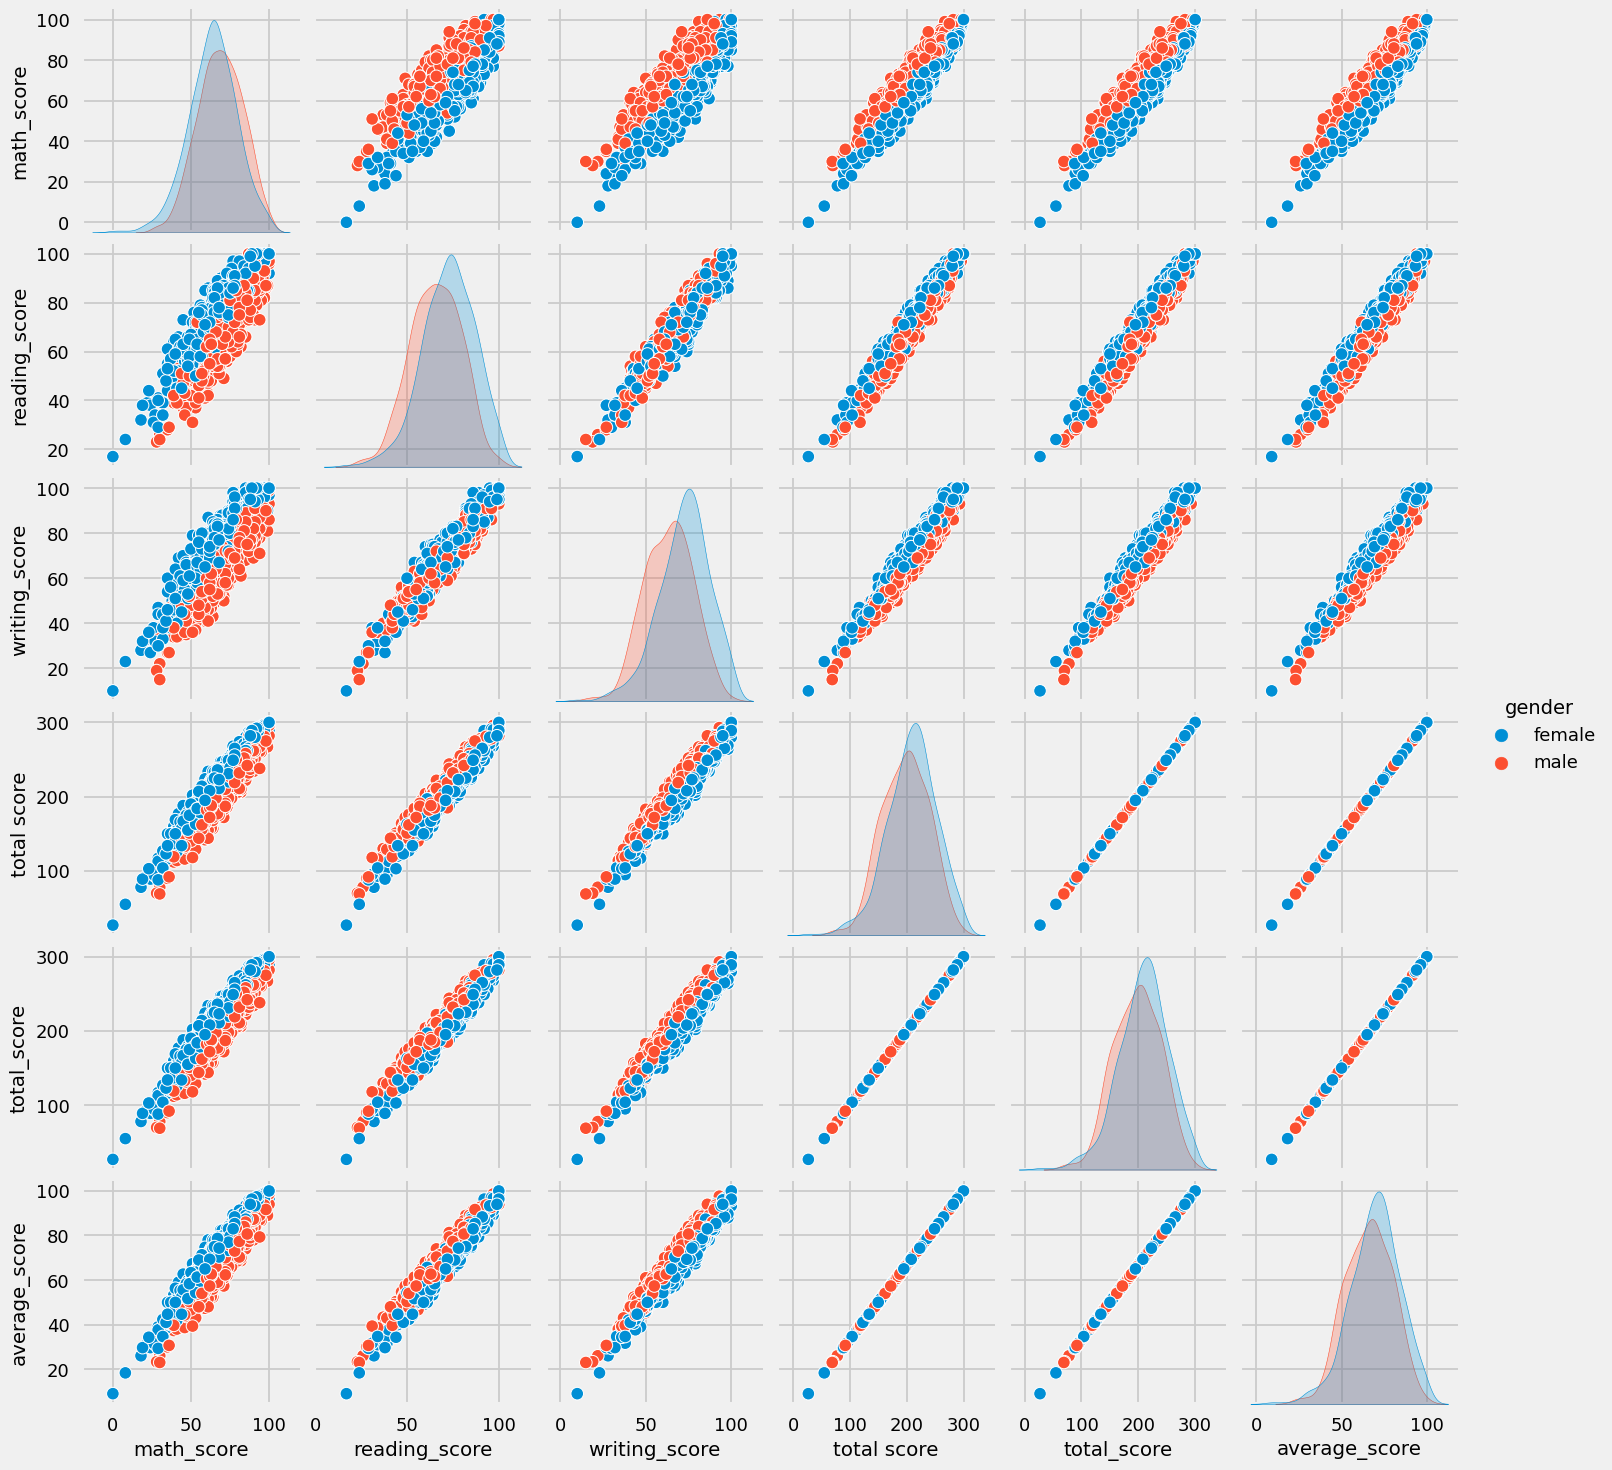

In [93]:
sns.pairplot(df,hue='gender')
plt.show()

> Insights

* from the above plot it is clear that all the scores increase linearly with each other


## 5. Conclusions

* Students performance is related with lunch,race,parental level education
* Females lead in pass percentage and also are top-scorers
* Students performance is not much realted with test preparation course
* Finishing preparation course is beneficial